# U.S. oil and gas Production analysis

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [2]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [ ]:
gas_df.shape

In [ ]:
gas_df.columns

In [ ]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

# Converting the Month column to datetime
Open and read the documentation on pd.to_datetime(). Insert a new code cell and try to update the Month column to a proper datetime.

In [3]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

In [ ]:
gas_df['Month'].dt.year.head()

In [ ]:
gas_df['Month'].dt.month.tail()

In [4]:
#In order to pass the tests we’ve written for this challenge, store the type of Month column in the month_type variable 
#as below:

month_type = gas_df['Month'].dtype

---

## Yearly Gas production

In [5]:
#How much gas has been produced yearly by each US state, and by the US as a whole?

yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()


<AxesSubplot:xlabel='Month'>

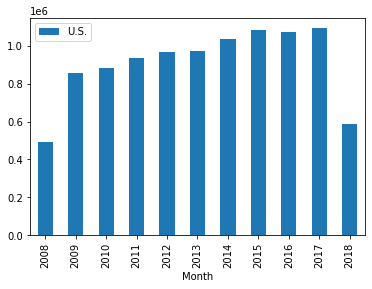

In [6]:

yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')

##### Discarding rows with Boolean Indexing
In the previous section, we’ve seen that the production data is not complete for the year 2008 and 2018 (we only have half of the year). We’d like to continue working with full years, meaning we need to discard the first and last rows of yearly_gas_df based on the year.

<AxesSubplot:xlabel='Month'>

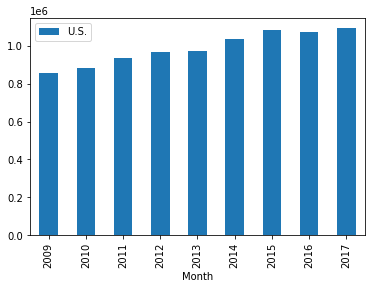

In [7]:
condition = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)
filtered_yearly_gas_df = yearly_gas_df[condition]

filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind='bar')

### State production

Let's have a look at the yearly production of some specific states

In [8]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

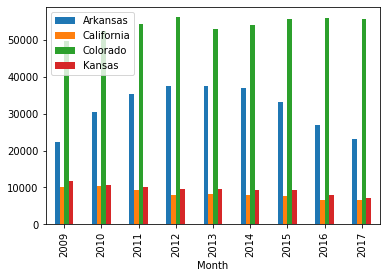

In [9]:
filtered_yearly_gas_df.filter(items=['Arkansas', 'California', 'Colorado','Kansas']).plot(kind='bar')

### Check your code

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('gas',
    month_type=month_type,
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

In [11]:
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 2 items

tests/test_gas.py::TestGas::test_month_column_is_a_datetime PASSED       [ 50%]
tests/test_gas.py::TestGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 2 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/gas.pickle

git commit -m 'Completed gas step'

git push origin master


---

## Comparing with Crude Oil Production

In [12]:
file_1 = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file_1, decimal=",")
oil_df.head(3)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


In [13]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')

In [19]:
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum()
yearly_oil_df

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2008,34211,149,4666,118,0,4095,589,7302,465,37,...,98,1286,56,35,1013,39,0,438,7773,7
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12
2014,105064,323,5958,224,0,6729,3139,16761,608,73,...,495,4605,222,60,2501,340,0,1346,38049,12
2015,113179,318,5796,205,0,6619,4036,18174,378,72,...,876,5484,232,53,2842,380,0,1222,41335,12
2016,105970,266,5874,183,0,6101,3820,19177,201,63,...,705,5102,207,47,2380,251,0,1001,38140,12


In [39]:
yearly_gas  = yearly_gas_df.filter(items=['U.S.'])
yearly_gas.rename(columns={'U.S.': 'Gas'}, inplace=True)

yearly_oil  = yearly_oil_df.filter(items=['U.S. Crude Oil '])
yearly_oil.rename(columns={'U.S. Crude Oil ': 'Crude Oil'}, inplace=True)


In [40]:
merged_df = pd.concat([yearly_gas, yearly_oil], axis=1)

<AxesSubplot:title={'center':'Gas and Crude Oil by Year in U.S.'}, xlabel='Month'>

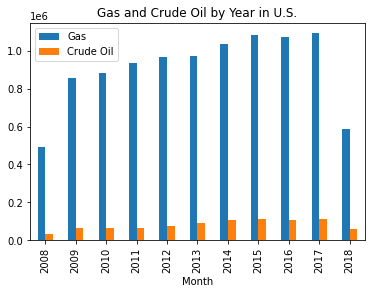

In [41]:
merged_df.plot(kind="bar", title = 'Gas and Crude Oil by Year in U.S.')

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2008=merged_df.iloc[0]["Crude Oil"],
)
result.write()

In [43]:
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 2 items

tests/test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
tests/test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2008 PASSED [100%]

============================== 2 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master
